# EDA

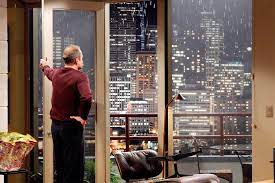

In this notebook I will look at the King County real estate market to help my imaginary shareholder Amy Williams make good decisions about buying and selling houses. She owns several central top notch houses, which she would like to sell over time, in order to be able to afford buying a bunch of average houses in the outskirts, to hide from the FBI (did I mention Amy is part of the mafia?).

## A Quick Overview of the Data while Cleaning and Preparing it

In [243]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [244]:
df = pd.read_csv("data/King_County_House_prices_dataset (3).csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [245]:
df.shape

(21597, 21)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* There are several columns with missing data, since I won't be using them, they'll just be dropped, along with some other columns not relevant to my analysis. This will make the tables more readable.
* The date column is storing strings, these will be turned into datetimes, based on which a couple of time based columns will be added.
* The sqft_basement column is also storing strings, it is not needed going forward, so it will be dropped.

### Dropping Columns with Null Values and Unused Data

In [247]:
df.drop(["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"], axis=1, inplace=True)
df.head()

,id,date,price,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,10/13/2014,221900.000,1180,5650,1955,0.000,98178,47.511,-122.257
1,6414100192,12/9/2014,538000.000,2570,7242,1951,1991.000,98125,47.721,-122.319
2,5631500400,2/25/2015,180000.000,770,10000,1933,NaN,98028,47.738,-122.233
3,2487200875,12/9/2014,604000.000,1960,5000,1965,0.000,98136,47.521,-122.393
4,1954400510,2/18/2015,510000.000,1680,8080,1987,0.000,98074,47.617,-122.045


### Timely Matters

In [248]:
df.date = pd.to_datetime(df.date) 

Let's find out what time the data spans, to find out which date based extra columns make sense. 

In [249]:
df.sort_values("date").head(1)

,id,date,price,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,lat,long
7316,2202500290,2014-05-02,435000.000,1450,8800,1954,0.000,98006,47.575,-122.135


In [250]:
df.sort_values("date").tail(1)

,id,date,price,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,lat,long
16580,9106000005,2015-05-27,1310000.000,3750,5000,1924,0.000,98115,47.675,-122.303


Looking at days, weeks and months might make sense, although I suspect that months will be the most useful, the rest being too fine grained.

In [251]:
df["year_month"] = df["date"].dt.strftime("%Y-%m")
df["year_week"] = df["date"].dt.strftime("%Y-%W")
df["day"] = df["date"].dt.strftime("%d")

### Duplicates

In [252]:
df.id.duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

There are some duplicated ids. Let's find out whether we are dealing with duplicated entries or information that should be preserved.

In [253]:
df[df.id.duplicated(keep=False)].sort_values("id").head(8)

,id,date,price,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,lat,long,year_month,year_week,day
2495,1000102,2015-04-22,300000.000,2400,9373,1991,0.000,98002,47.326,-122.214,2015-04,2015-16,22
2494,1000102,2014-09-16,280000.000,2400,9373,1991,0.000,98002,47.326,-122.214,2014-09,2014-37,16
16800,7200179,2014-10-16,150000.000,840,12750,1925,0.000,98055,47.484,-122.211,2014-10,2014-41,16
16801,7200179,2015-04-24,175000.000,840,12750,1925,NaN,98055,47.484,-122.211,2015-04,2015-16,24
11422,109200390,2014-10-20,250000.000,1480,3900,1980,0.000,98023,47.298,-122.367,2014-10,2014-42,20
11421,109200390,2014-08-20,245000.000,1480,3900,1980,0.000,98023,47.298,-122.367,2014-08,2014-33,20
12406,123039336,2014-12-08,244900.000,620,8261,1939,NaN,98106,47.514,-122.364,2014-12,2014-49,08
12405,123039336,2014-06-11,148000.000,620,8261,1939,0.000,98106,47.514,-122.364,2014-06,2014-23,11


That looks more like some houses got sold several times, so we'll keep these entries. Making sure that they all differ in some respect:

In [254]:
df.duplicated().value_counts()

False    21597
dtype: int64

### Distinguishing Centre and Outskirts

In [255]:
df.describe()

,id,price,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,lat,long
count,21597.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,2080.322,15099.409,1971.000,83.637,98077.952,47.560,-122.214
std,2876735715.748,367368.140,918.106,41412.637,29.375,399.946,53.513,0.139,0.141
min,1000102.000,78000.000,370.000,520.000,1900.000,0.000,98001.000,47.156,-122.519
25%,2123049175.000,322000.000,1430.000,5040.000,1951.000,0.000,98033.000,47.471,-122.328
50%,3904930410.000,450000.000,1910.000,7618.000,1975.000,0.000,98065.000,47.572,-122.231
75%,7308900490.000,645000.000,2550.000,10685.000,1997.000,0.000,98118.000,47.678,-122.125
max,9900000190.000,7700000.000,13540.000,1651359.000,2015.000,2015.000,98199.000,47.778,-121.315


We will have to categorize the entries into central and outskirts, the zipcode column seems suited for this.

In [256]:
df.zipcode.nunique()

70

Seventy zipcodes to compare to a map seem unwieldly, so I will use population density as a proxy. The density by ZCTA data comes from the 2010 US census, via this [blogpost](https://blog.splitwise.com/2013/09/18/the-2010-us-census-population-by-zip-code-totally-free/). It should be mentioned, that zipcodes and [ZCTAs](https://www.census.gov/programs-surveys/geography/guidance/geo-areas/zctas.html) are not quite the same thing, but they are close enough for this purpose.

In [257]:
density = pd.read_csv("data/Zipcode-ZCTA-Population-Density-And-Area-Unsorted.csv")
density_kc = density[density["Zip/ZCTA"].isin(df.zipcode)]
density_kc.head()

,Zip/ZCTA,2010 Population,Land-Sq-Mi,Density Per Sq Mile
32308,98001,31911,18.595,1716.106
32309,98002,31647,7.148,4427.392
32310,98003,44151,11.614,3801.533
32311,98004,27946,7.069,3953.317
32312,98005,17714,7.498,2362.497


In [258]:
density_kc.shape

(70, 4)

As a threshold for the distinction between centre and outskirts, I will use a density of 6000 people per square mile. Let's perfom some quick sanity checks on that. 

In [259]:
density_kc.sort_values("Density Per Sq Mile", ascending=False, inplace=True)
density_kc.reset_index(inplace=True, drop=True)
density_kc.head(20)

,Zip/ZCTA,2010 Population,Land-Sq-Mi,Density Per Sq Mile
0,98102,20756,1.287,16127.428
1,98122,31454,2.314,13592.913
2,98105,43924,4.124,10650.824
3,98109,20715,1.999,10362.681
4,98103,45911,4.635,9905.286
5,98107,21147,2.192,9647.354
6,98119,21039,2.437,8633.156
7,98117,31365,3.854,8138.298
8,98144,26881,3.405,7894.567
9,98116,22241,2.956,7524.019


The 17 zipcodes with the highest population density out of 70 get classified as central, that seems reasonable.
Let's also take a look at a map of which houses get classified how, for that we first need to join the density data to the house data. 

In [260]:
# Set index on density data for join
density_kc.set_index("Zip/ZCTA", inplace=True)
density_kc.drop(["2010 Population", "Land-Sq-Mi"], axis=1, inplace=True)
df = df.join(density_kc, on="zipcode")
df.rename({"Density Per Sq Mile": "density"}, axis=1, inplace=True)
# Create a boolean column with the classification for convenience
df["central"] = df.density >= 6000 
df.head()

,id,date,price,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,lat,long,year_month,year_week,day,density,central
0,7129300520,2014-10-13,221900.000,1180,5650,1955,0.000,98178,47.511,-122.257,2014-10,2014-41,13,4970.497,False
1,6414100192,2014-12-09,538000.000,2570,7242,1951,1991.000,98125,47.721,-122.319,2014-12,2014-49,09,6879.592,True
2,5631500400,2015-02-25,180000.000,770,10000,1933,NaN,98028,47.738,-122.233,2015-02,2015-08,25,3612.703,False
3,2487200875,2014-12-09,604000.000,1960,5000,1965,0.000,98136,47.521,-122.393,2014-12,2014-49,09,6424.532,True
4,1954400510,2015-02-18,510000.000,1680,8080,1987,0.000,98074,47.617,-122.045,2015-02,2015-07,18,2410.861,False


Just checking we didn\'t lose any rows:

In [261]:
df.shape

(21597, 15)

In [262]:
fig = px.scatter_mapbox(df, lat="lat", lon="long", color="central", zoom=4, height=500, width=700, opacity=0.06)
fig.update_layout(mapbox_style="stamen-terrain", geo_scope="usa", margin={"r":0,"t":0,"l":0,"b":0}, mapbox_center_lat = 47.5, mapbox_zoom=7.4)

This is a bit rough, but it looks like our central area covers both mostly and most of Seattle, that seems fine. So we can split our data and look at the two categories seperately:

In [263]:
central = df[df.central]
outskirts = df[df.central == False]

In [264]:
central.shape

(5888, 15)

In [265]:
outskirts.shape

(15709, 15)

In [266]:
central.describe()

,id,price,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,lat,long,density
count,5888.000,5888.000,5888.000,5888.000,5888.000,4822.000,5888.000,5888.000,5888.000,5888.000
mean,4754154380.203,595727.368,1792.373,5036.551,1952.503,134.179,98119.007,47.641,-122.334,8208.031
std,2902373308.680,345829.494,791.961,3335.769,35.410,500.015,11.121,0.065,0.040,2097.371
min,3600057.000,109000.000,370.000,520.000,1900.000,0.000,98102.000,47.512,-122.415,6279.774
25%,2391601428.750,400000.000,1250.000,3144.000,1924.000,0.000,98112.000,47.580,-122.371,6838.054
50%,4206901470.000,515000.000,1620.000,4800.000,1947.000,0.000,98117.000,47.660,-122.336,7524.019
75%,7324525495.000,680000.000,2180.000,6348.500,1986.000,0.000,98125.000,47.690,-122.298,9647.354
max,9842300540.000,7700000.000,12050.000,91681.000,2015.000,2015.000,98144.000,47.778,-122.249,16127.428


In [267]:
outskirts.describe()

,id,price,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,lat,long,density
count,15709.000,15709.000,15709.000,15709.000,15709.000,12933.000,15709.000,15709.000,15709.000,15709.000
mean,4515376039.363,519520.170,2188.250,18871.139,1977.933,64.792,98062.563,47.530,-122.169,2838.961
std,2864447987.584,373016.888,938.664,47974.025,23.240,353.679,54.973,0.146,0.139,1610.700
min,1000102.000,78000.000,380.000,572.000,1900.000,0.000,98001.000,47.156,-122.519,41.212
25%,2025701190.000,298950.000,1520.000,6698.000,1962.000,0.000,98027.000,47.410,-122.274,1535.889
50%,3876312490.000,425000.000,2030.000,8719.000,1979.000,0.000,98045.000,47.533,-122.176,3339.182
75%,7305900082.000,624900.000,2670.000,12700.000,1998.000,0.000,98075.000,47.648,-122.077,4330.559
max,9900000190.000,7060000.000,13540.000,1651359.000,2015.000,2015.000,98199.000,47.778,-121.315,5678.531


## Some Hypotheses about the Relationship between the Categories to Look at:
* Prices per sq ft living space in the outskirts are lower
* Prices per sq ft land in the outskirts are lower
* Houses in the outskirts tend to be built later

If these are correct, it's looking nice for Amy, since the average houses in the outskirts she's looking to buy, will be newer and more spacious than their central counterparts would be.

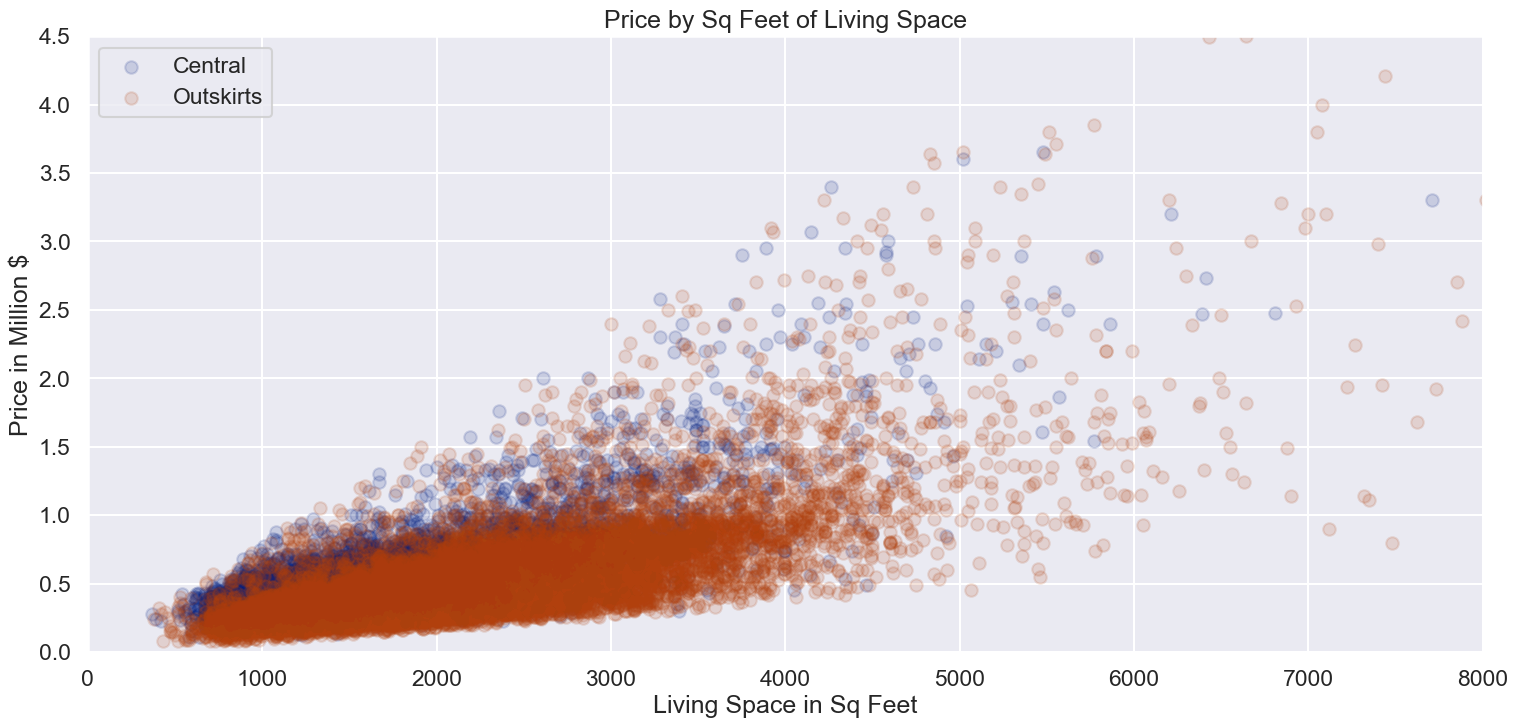

In [225]:
# Set scaling, style, color_palette and figuresize for all upcoming seaborn and matplotlib figures
sns.set_theme(context="talk", style="darkgrid", palette="dark", rc={"figure.figsize":(18, 8)})
fig, ax = plt.subplots()
ax.scatter(central.sqft_living, central.price, alpha=0.15)
ax.scatter(outskirts.sqft_living, outskirts.price, alpha=0.15)
# Set xlim and ylim to 'zoom in' on the busiest part of the scatter plot
ax.set_xlim(0, 8000)
ax.set_ylim(0, 4500000)
ax.legend(labels=["Central", "Outskirts"])
ax.set_title("Price by Sq Feet of Living Space")
ax.set_xlabel("Living Space in Sq Feet")
ax.set_yticklabels(np.arange(0, 5, 0.5))
ax.set_ylabel("Price in Million $")
plt.show()

That prices per sq ft of living space in the outskirts are lower seems correct, especially particularly large houses in the ouskirts seem to be less expensive. How about the lot size: 

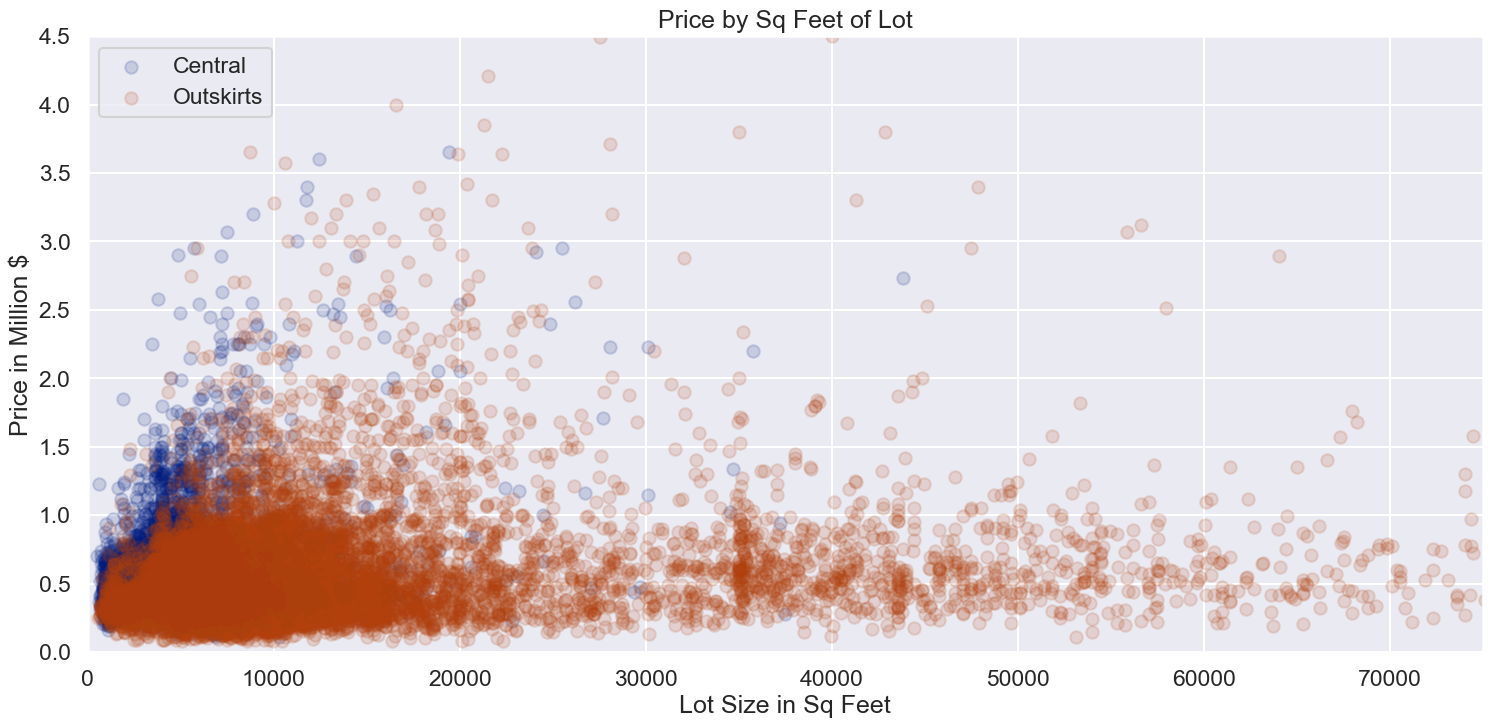

In [226]:
fig, ax = plt.subplots()
ax.scatter(central.sqft_lot, central.price, alpha=0.15)
ax.scatter(outskirts.sqft_lot, outskirts.price, alpha=0.15)
ax.set_xlim(0, 75000)
ax.set_ylim(0, 4500000)
ax.legend(labels=["Central", "Outskirts"])
ax.set_title("Price by Sq Feet of Lot")
ax.set_xlabel("Lot Size in Sq Feet")
ax.set_yticklabels(np.arange(0, 5, 0.5))
ax.set_ylabel("Price in Million $")
sns.move_legend(ax, "upper left")
plt.show()

That prices per sq ft of lot in the outskirts are lower seems correct as well, here it is even more striking that in the outskirts there are huge lots to have for very little money. Let's look at the years the houses were built:

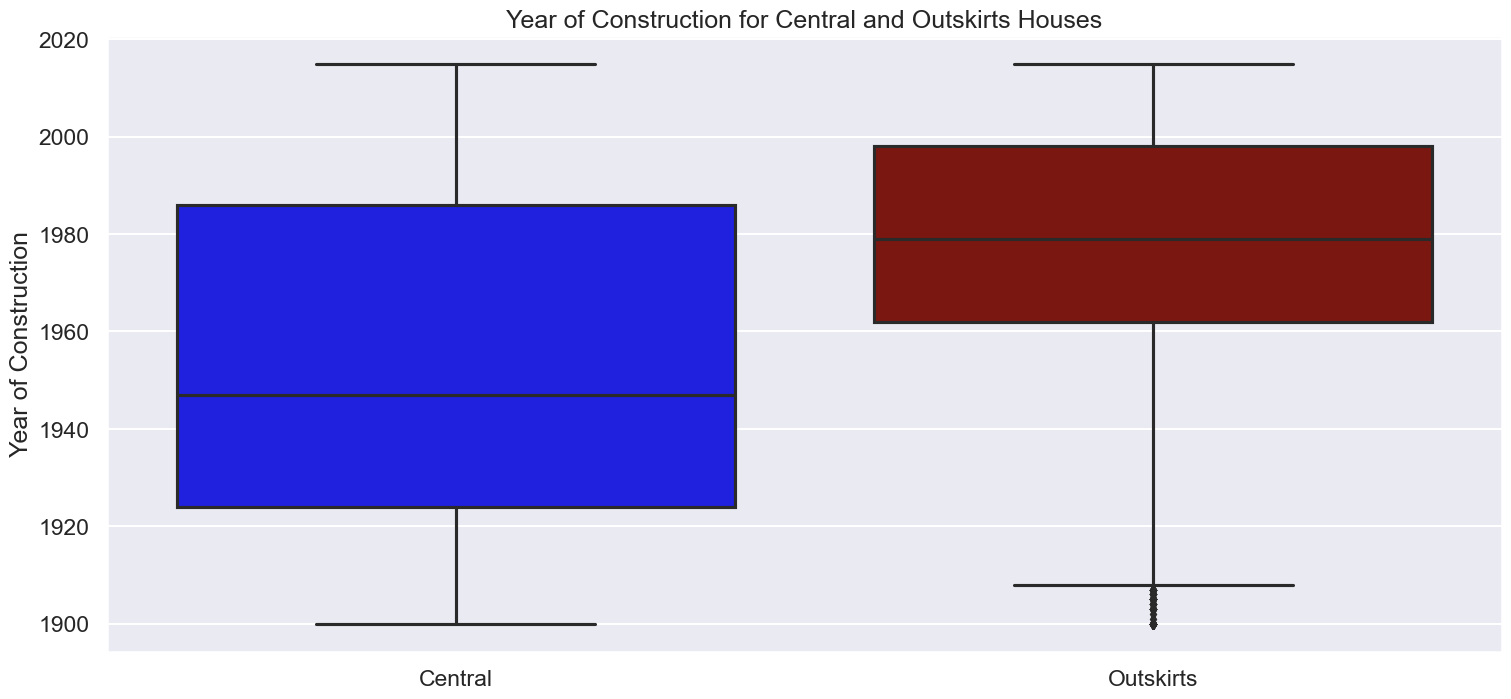

In [227]:
ax = sns.boxplot(data=df, x="central", y="yr_built", order=[True, False], palette=["blue", "r"])
ax.set_title("Year of Construction for Central and Outskirts Houses")
ax.set_xticklabels(["Central", "Outskirts"])
ax.set_xlabel(None)
ax.set_ylabel("Year of Construction")
plt.show()

Indeed, houses in central areas tend to be quite a bit older.

## Analyzing good selling and buying conditions for Amy

The central houses that Amy wants to sell are in the top 10 % price segment, so we will look at the selling conditions for such houses, as well as the buying conditions on average outskirts houses like she wants to buy. Based on this a sell/buy strategy will be recommended. In what follows, I am assuming that seasonal variations in house pricing exist, which we can not establish, since the data only spans one year. These will be analysed using data grouped by month. 

But first, let's separate out central houses in the same price segment as Amy's: 

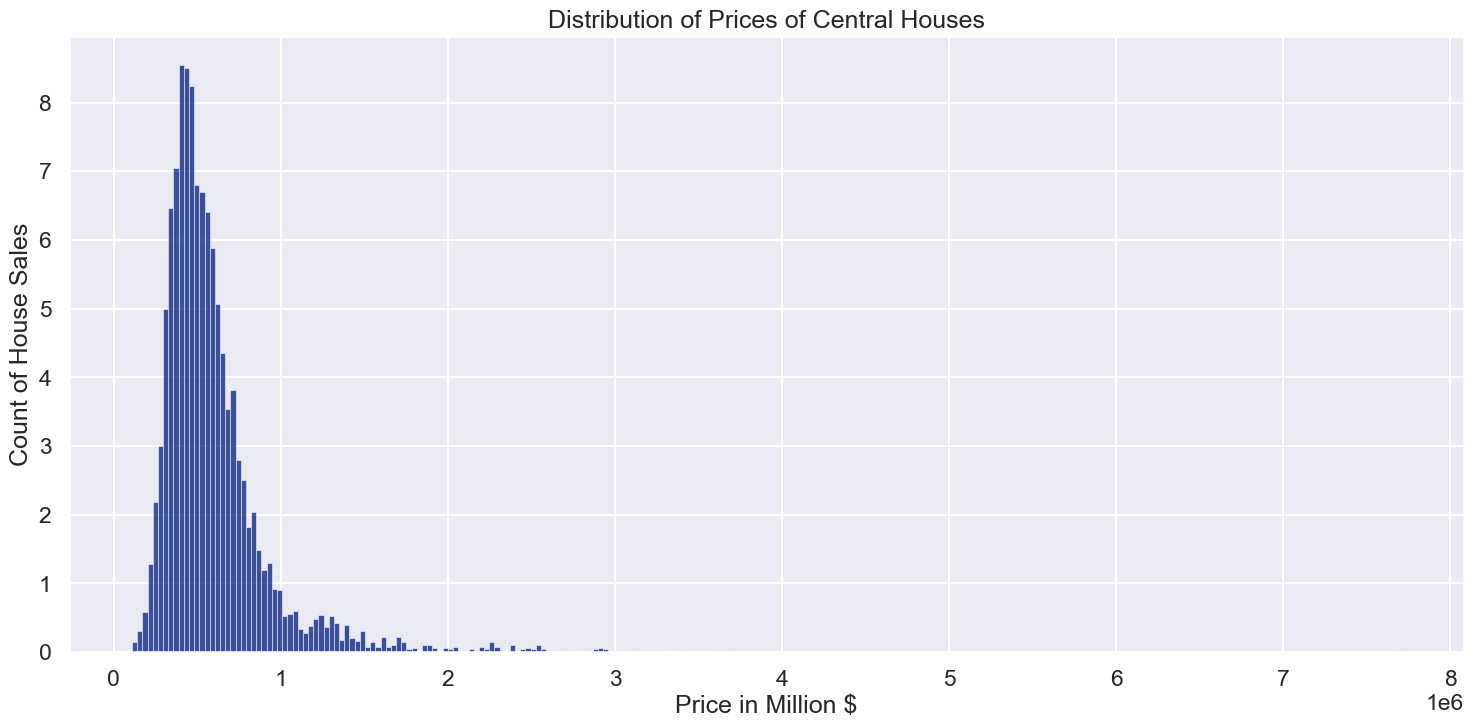

In [228]:
ax = sns.histplot(data=central, x="price")
ax.set_title("Distribution of Prices of Central Houses")
ax.set_xlabel("Price in Million $")
ax.set_ylabel("Count of House Sales")
ax.set_yticklabels(np.arange(0, 9, 1))
plt.show()

In [229]:
central.price.quantile(0.9)

921150.0000000001

In [230]:
top_central = central[central.price >= central.price.quantile(0.9)]

In [231]:
top_central.shape

(589, 15)

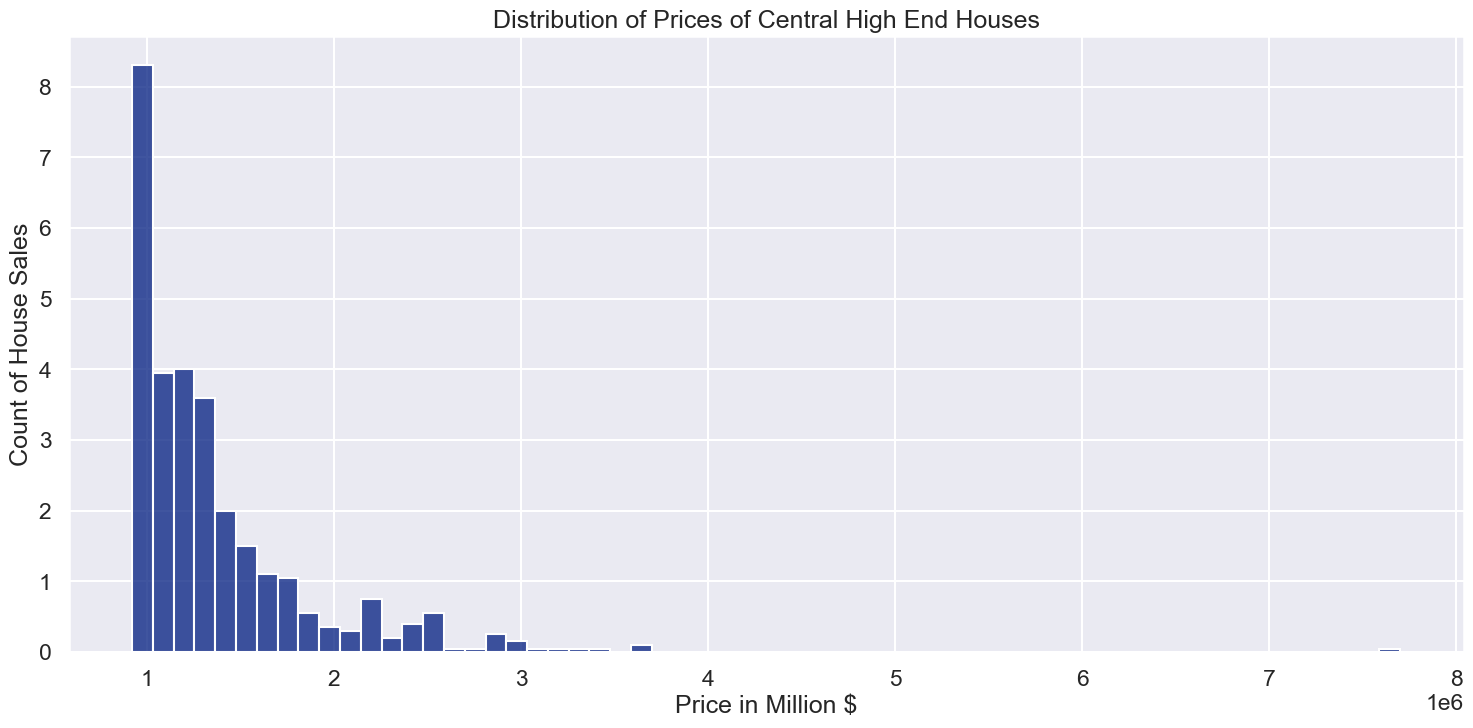

In [232]:
ax = sns.histplot(data=top_central, x="price")
ax.set_title("Distribution of Prices of Central High End Houses")
ax.set_xlabel("Price in Million $")
ax.set_ylabel("Count of House Sales")
ax.set_yticklabels(np.arange(0, 9, 1))
plt.show()

There seems to be one *very* expensive house at almost 8 million. There is no need to get rid of the outlier - medians are more useful than means for distributions this skewed anyway.
Let's group the data by times, to look at patterns in house prices:

In [233]:
tc_by_ym = top_central.groupby(["year_month"]).median().reset_index()
tc_by_yw = top_central.groupby(["year_week"]).median().reset_index()
tc_by_d = top_central.groupby(["day"]).median().reset_index()

In [234]:
o_by_ym = outskirts.groupby(["year_month"]).median().reset_index()
o_by_yw = outskirts.groupby(["year_week"]).median().reset_index()
o_by_d = outskirts.groupby(["day"]).median().reset_index()

Let's look at how prices develop month to month for the expensive kind of house Amy is selling:

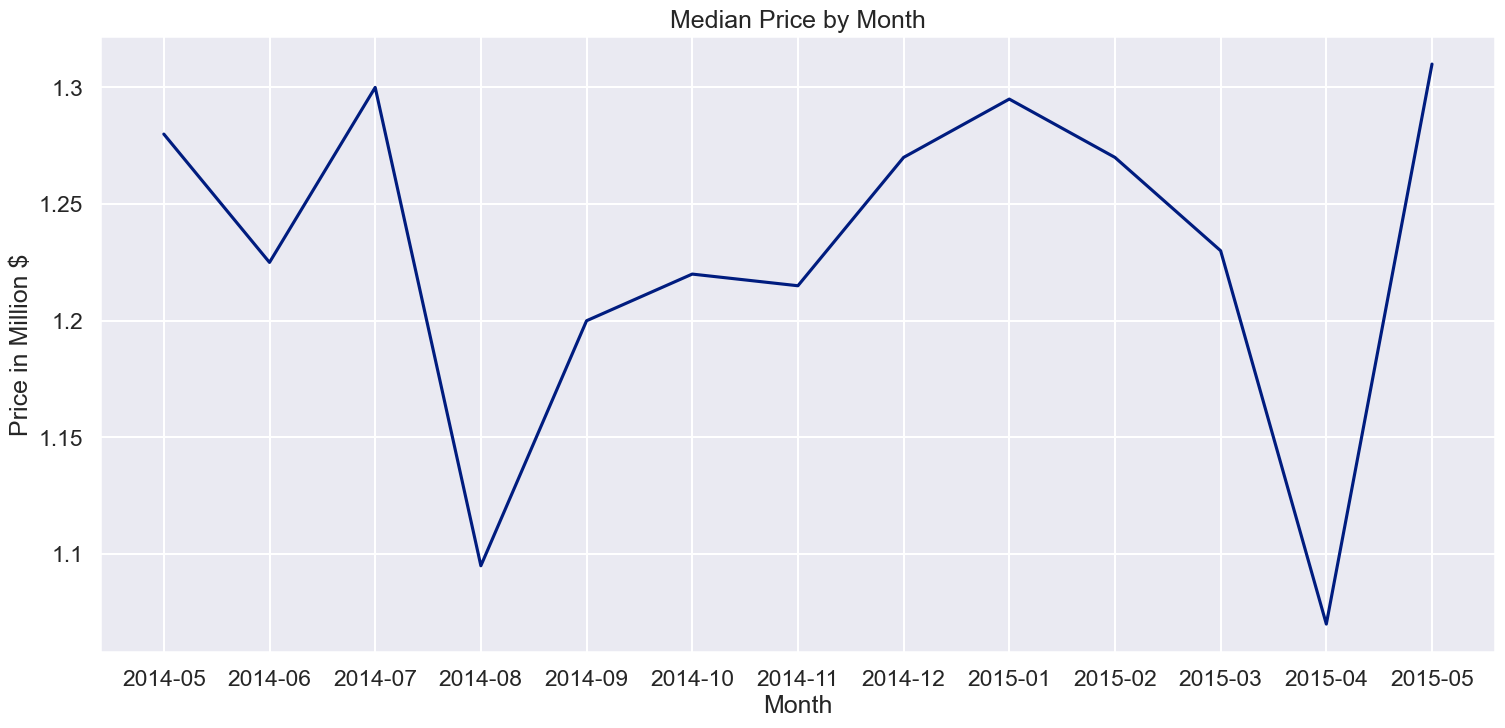

In [235]:
fig, ax = plt.subplots()
ax.plot(tc_by_ym.year_month, tc_by_ym.price)
ax.set_title("Median Price by Month")
ax.set_xlabel("Month")
ax.set_yticklabels([1.05, 1.1, 1.15, 1.2, 1.25, 1.3])
ax.set_ylabel("Price in Million $")
plt.show()

Again, we are assuming here, that we are seeing a seasonal pattern, there is no way of checking that with data that only spans one year and one month, but two low point months with higher prices around and between them seems plausible enough. Taking the variation in median price by month at face value, it, indeed, matters very much when exactly to sell a high-priced house. The prices can vary by over $200.000 month to month.

Next we'll look at our other options for time intervals to structure the data by, first, weeks:

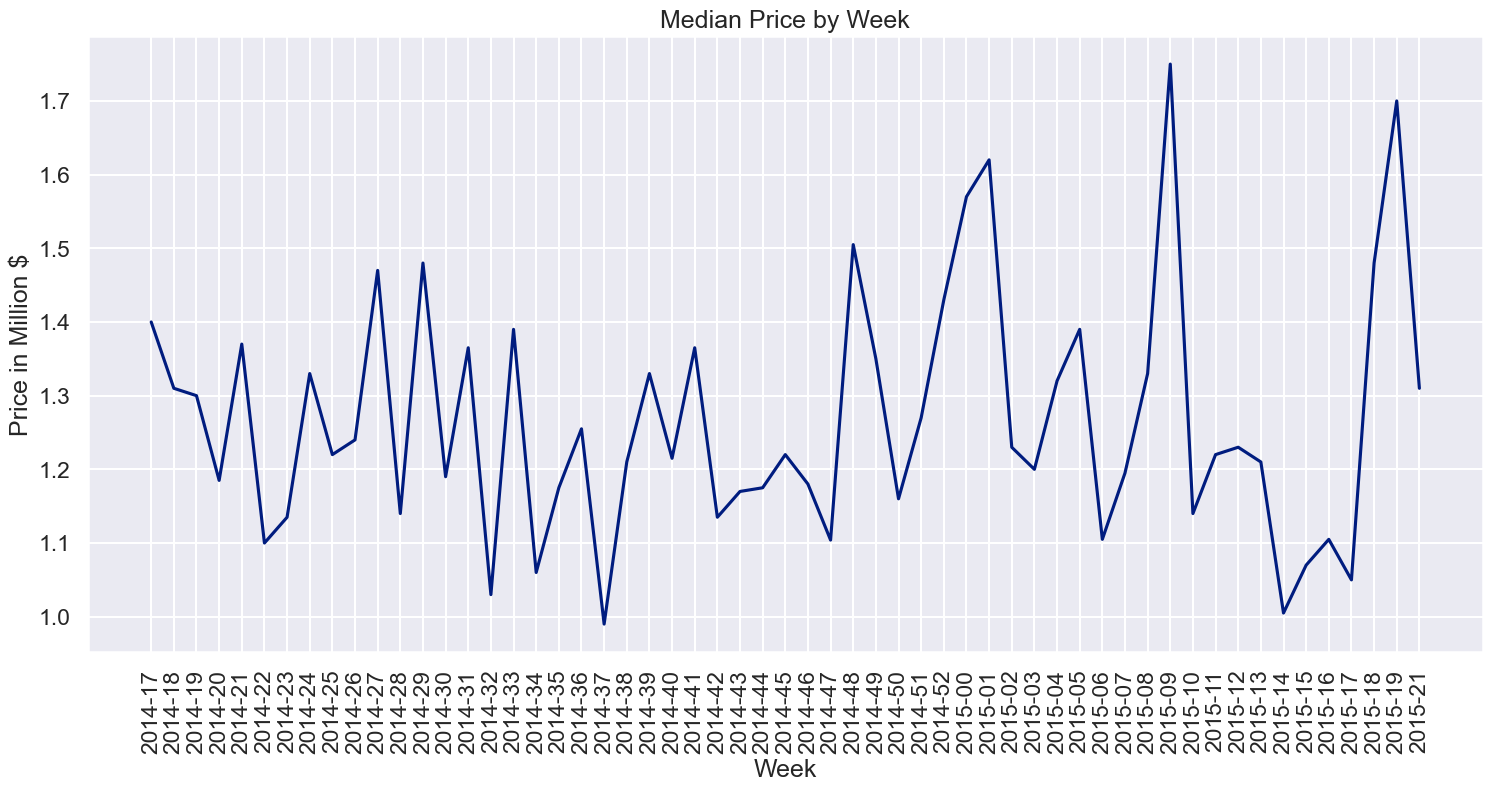

In [236]:
fig, ax = plt.subplots()
ax.plot(tc_by_yw.year_week, tc_by_yw.price)
ax.set_title("Median Price by Week")
ax.set_xlabel("Week")
ax.set_yticklabels([0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7])
ax.set_ylabel("Price in Million $")
plt.xticks(rotation=90)
plt.show()

Weeks look way too busy to be useful. Probably the sample size gets really small in these small time increments. Which means we should check that this isn't already the case for months: 

In [237]:
tc_count = top_central.groupby(["year_month"]).count().reset_index()
tc_count

,year_month,id,date,price,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,lat,long,year_week,day,density,central
0,2014-05,53,53,53,53,53,53,44,53,53,53,53,53,53,53
1,2014-06,60,60,60,60,60,60,50,60,60,60,60,60,60,60
2,2014-07,65,65,65,65,65,65,47,65,65,65,65,65,65,65
3,2014-08,44,44,44,44,44,44,34,44,44,44,44,44,44,44
4,2014-09,45,45,45,45,45,45,37,45,45,45,45,45,45,45
5,2014-10,50,50,50,50,50,50,46,50,50,50,50,50,50,50
6,2014-11,42,42,42,42,42,42,34,42,42,42,42,42,42,42
7,2014-12,42,42,42,42,42,42,33,42,42,42,42,42,42,42
8,2015-01,26,26,26,26,26,26,23,26,26,26,26,26,26,26
9,2015-02,23,23,23,23,23,23,17,23,23,23,23,23,23,23


No, for most months there are 40-60 houses sold, that ought to be sufficient.

Now let's have a look at days, maybe we can make out a time of month pattern:

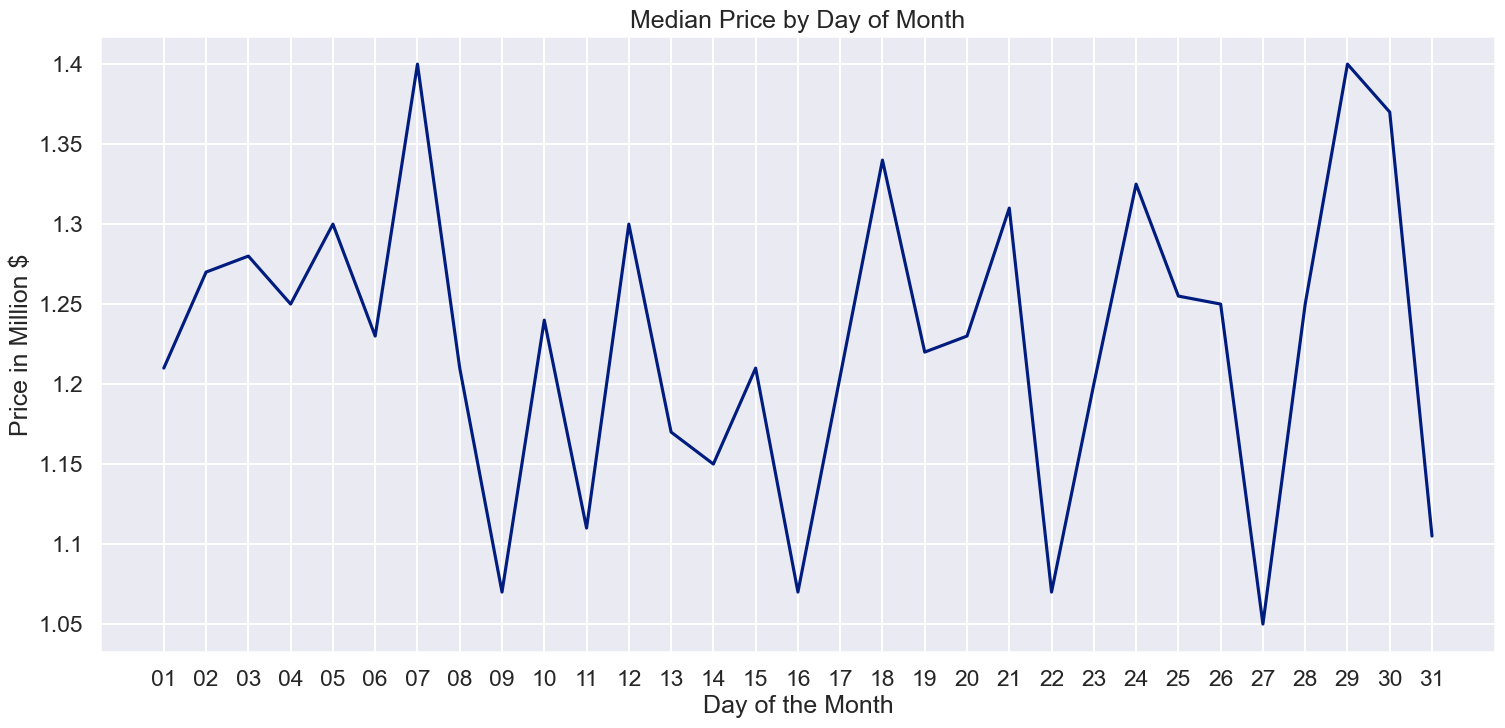

In [238]:
fig, ax = plt.subplots()
ax.plot(tc_by_d.day, tc_by_d.price)
ax.set_title("Median Price by Day of Month")
ax.set_xlabel("Day of the Month")
ax.set_yticklabels([1.00, 1.05, 1.10, 1.15, 1.20, 1.25, 1.30, 1.35, 1.40])
ax.set_ylabel("Price in Million $")
plt.show()

Doesn't seem that there is anything to see here, so, as suspected in the beginning, months seem the most plausible grouping to look at.

So which recommendations for Amy, about her sales and purchases, can we gather from our month-grouped data? For a start, here are the median prices for both the category of house to be sold and the category of house to be purchsed: 

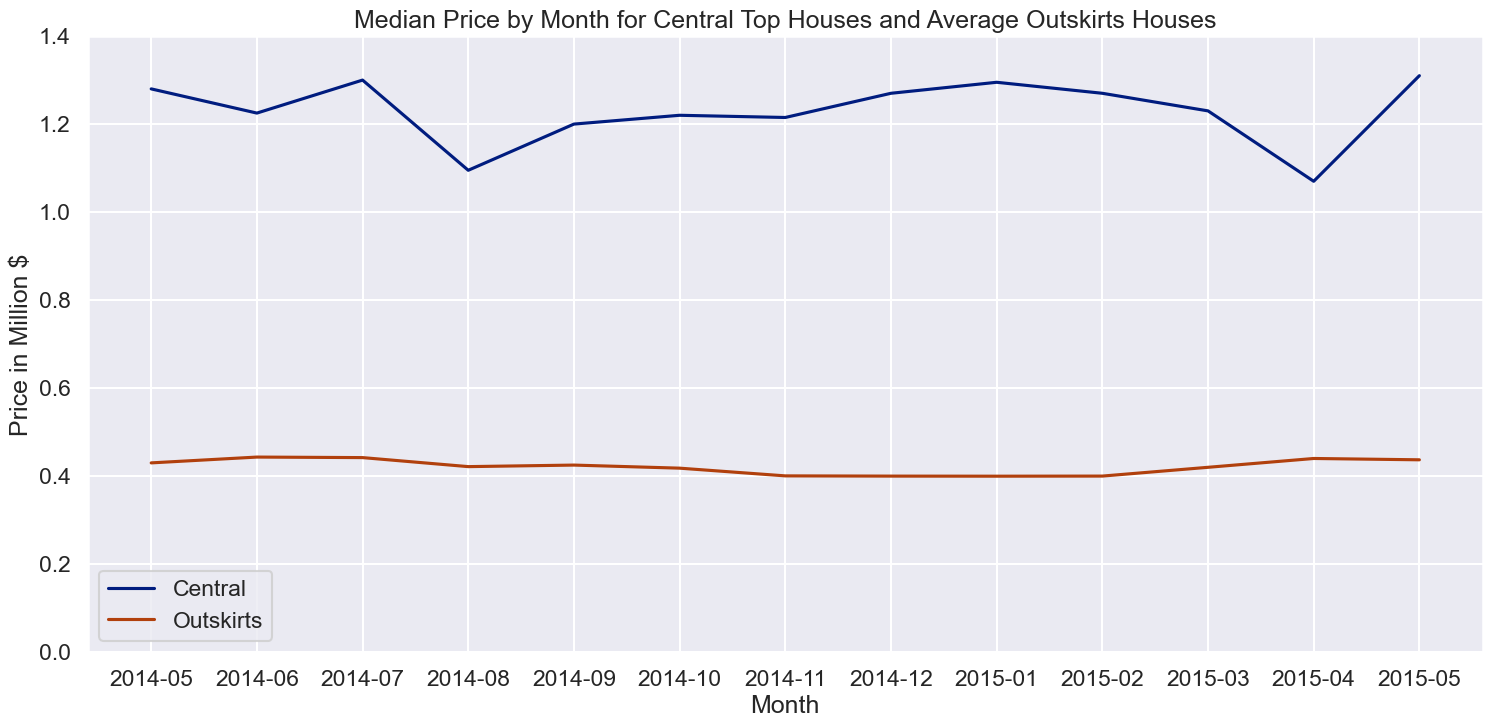

In [239]:
fig, ax = plt.subplots()
ax.plot(tc_by_ym.year_month, tc_by_ym.price)
ax.plot(o_by_ym.year_month, o_by_ym.price)
ax.set_ylim(0, 1400000)
ax.set_title("Median Price by Month for Central Top Houses and Average Outskirts Houses")
ax.legend(labels=["Central", "Outskirts"])
ax.set_xlabel("Month")
ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
ax.set_ylabel("Price in Million $")
plt.show()

Unsurprisingly, the high end houses vary much more in price than the average houses, so for Amy's situation we have:

**Recommendation 1:** Selling well is more important than buying well and should be focused on.

Next, how about the best timing? Assuming it takes some time to sell a house and find one to buy, let's find out which month's high end house price buys the most average houses at the price of the month after:

In [240]:
# Calculate the ratio of a month's high end house price with the next month's average house price by shifting the latter by -1 
tc_by_ym["worth_x_next_month_houses"] = tc_by_ym.price / o_by_ym.price.shift(-1)
tc_by_ym

,year_month,id,price,sqft_living,sqft_lot,yr_built,yr_renovated,zipcode,lat,long,density,central,worth_x_next_month_houses
0,2014-05,4217401180.000,1280000.000,2920.000,6480.000,1932.000,0.000,98112.000,47.641,-122.303,8138.298,1.000,2.888
1,2014-06,3362650083.000,1225000.000,2980.000,5085.500,1926.500,0.000,98113.500,47.632,-122.322,8138.298,1.000,2.771
2,2014-07,4141800285.000,1300000.000,3170.000,5500.000,1931.000,0.000,98112.000,47.635,-122.301,7894.567,1.000,3.084
3,2014-08,4700350852.500,1095000.000,3145.000,5139.500,1951.000,0.000,98115.000,47.640,-122.311,7013.661,1.000,2.576
4,2014-09,5244801550.000,1200000.000,3030.000,5335.000,1930.000,0.000,98115.000,47.631,-122.303,8138.298,1.000,2.871
5,2014-10,5085351150.000,1220000.000,2950.000,5450.000,1951.500,0.000,98113.500,47.638,-122.319,8385.727,1.000,3.046
6,2014-11,4232651352.500,1215000.000,3375.000,5562.500,1936.500,0.000,98112.000,47.640,-122.300,8633.156,1.000,3.038
7,2014-12,3436500470.000,1270000.000,3005.000,6120.000,1928.000,0.000,98112.000,47.636,-122.288,7894.567,1.000,3.177
8,2015-01,4878700495.000,1295000.000,3000.000,6694.000,1959.000,0.000,98112.000,47.644,-122.290,8138.298,1.000,3.237
9,2015-02,5318100965.000,1270000.000,2910.000,5974.000,1949.000,0.000,98112.000,47.635,-122.323,8633.156,1.000,3.024


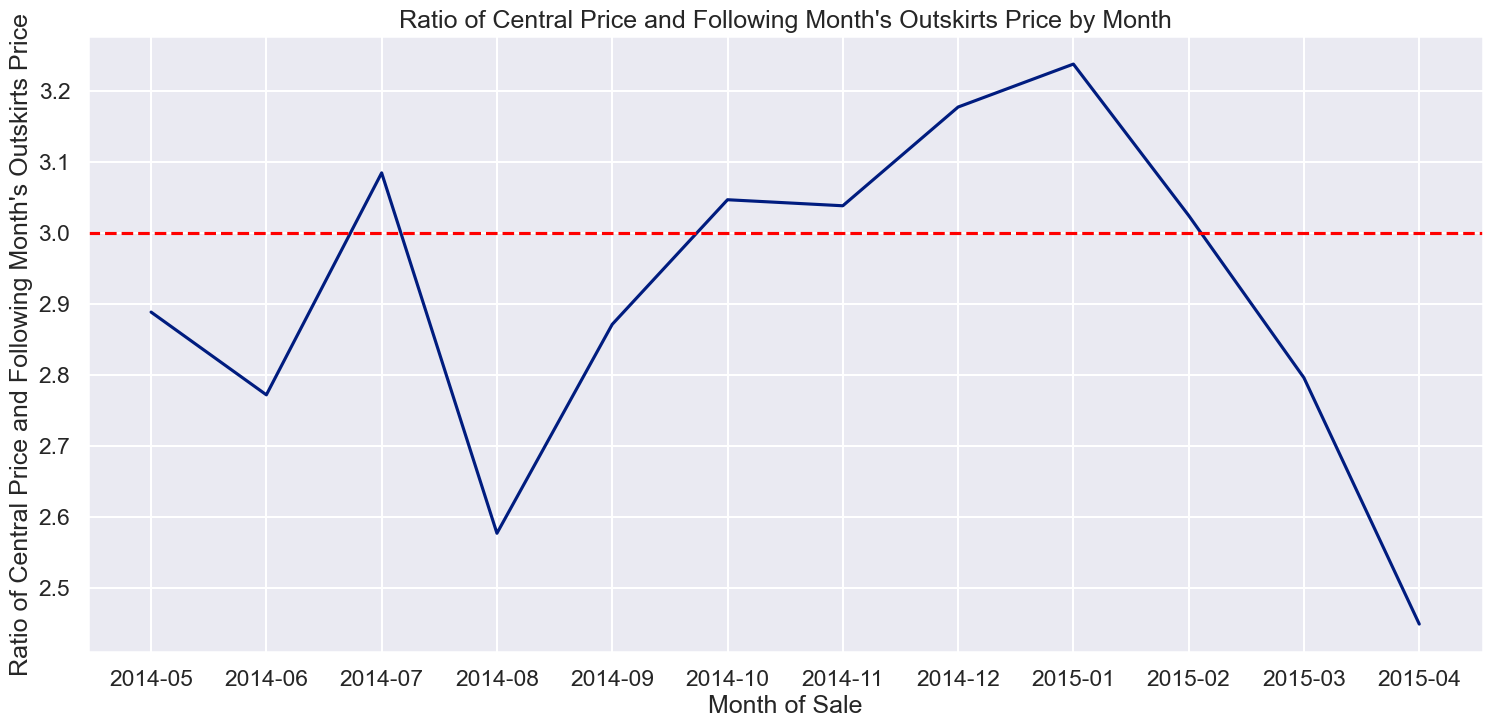

In [241]:
fig, ax = plt.subplots()
ax.plot(tc_by_ym.year_month, tc_by_ym["worth_x_next_month_houses"])
ax.axhline(3.0, c="red", linestyle="--")
ax.set_title("Ratio of Central Price and Following Month's Outskirts Price by Month")
ax.set_xlabel("Month of Sale")
ax.set_ylabel("Ratio of Central Price and Following Month's Outskirts Price")
plt.show()

There are quite a few months in which Amy can buy three houses after her sale and still have money left over. Therefore:

**Recommendation 2:** Sell in July and between October and February

The high prices in winter suggest, that maybe supply isn't that great. Here is outskirts houses sold by month, since there is no data on when houses entered the market, only on when they are sold, this is the best proxy for house availability in the dataset:

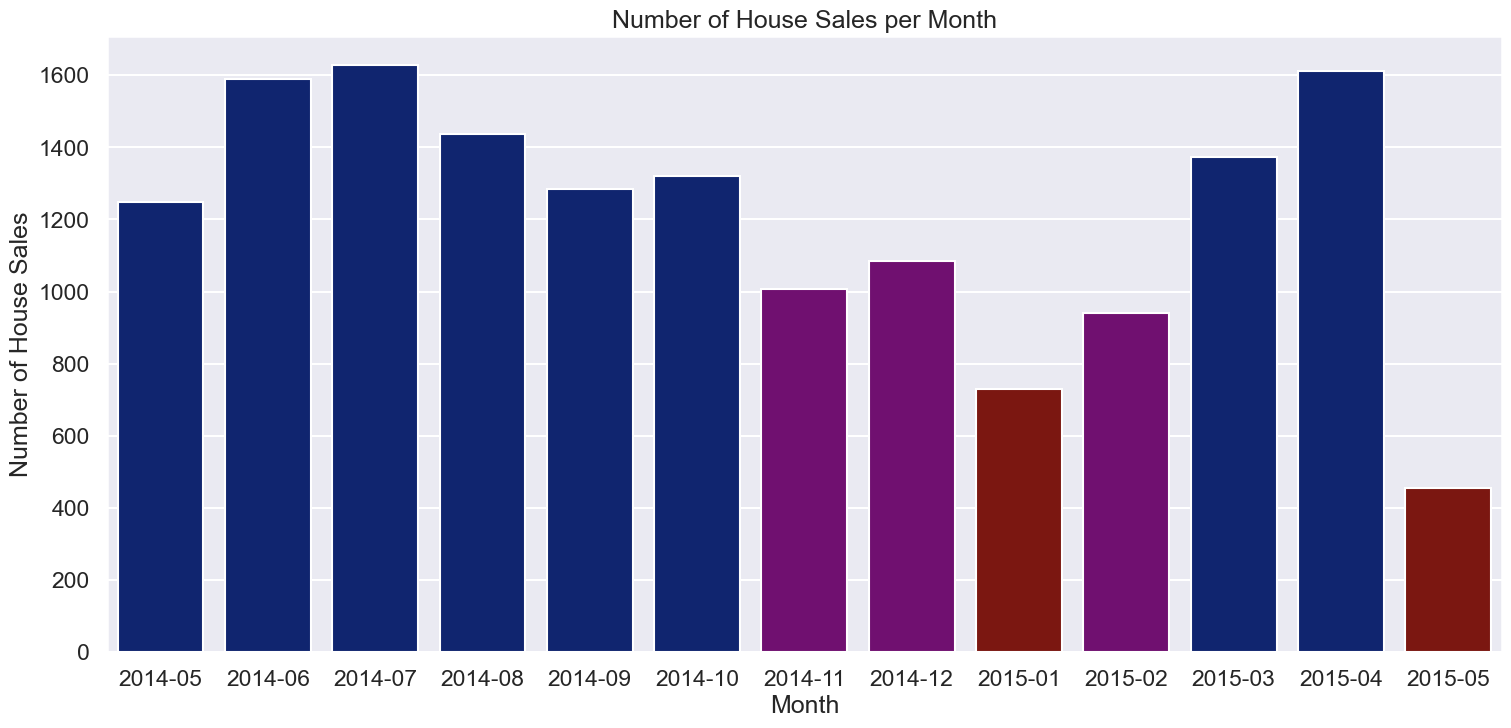

In [242]:
ax = sns.countplot(data=outskirts.sort_values("year_month"), x="year_month", palette=["b"]*6 + ["purple"]*2 + ["r"] + ["purple"] + ["b"]*2 + ["r"])
ax.set_title("Number of House Sales per Month")
ax.set_xlabel("Month")
ax.set_ylabel("Number of House Sales")
plt.show()

Looks like there are indeed fewer houses on the market in the winter months (and in May 2015, which I would guess is due to incomplete data for that month), which leads to:

**Recommendation 3:** Plan additional time for finding houses to buy between November and February, don't rely on finding houses in January.  

## Further Research Directions:
* Correlation availability / price?
* Do the by-month patterns hold up next year?